**Uber Technologies, Inc.**, commonly known as **Uber**, is an American technology company. Its services include ride-hailing, food delivery, package delivery, couriers, freight transportation, and, through a partnership with Lime, electric bicycle and motorized scooter rental.

We will mainly use data regarding **Uber ride**


In this, we will use Python to analyze data from Uber.

By the end of this, you will gain a hands-on experience with Python in analyzing data.

We will use Python to:


*   Check how long do people travel with Uber?
*   What Hour Do Most People Take Uber To Their Destination?
* Check The Purpose Of Trips
* Which Day Has The Highest Number Of Trips
* What Are The Number Of Trips Per Each Day?
* What Are The Trips In The Month
* The starting points of trips. Where Do People Start Boarding Their Trip From Most?

###Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

In [2]:
data = pd.read_csv('/content/Uber Drives - .csv')
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


### Check for Missing Values

In [3]:
data.isnull()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1151,False,False,False,False,False,False,False
1152,False,False,False,False,False,False,False
1153,False,False,False,False,False,False,False
1154,False,False,False,False,False,False,False


In [5]:
data.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [6]:
data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [7]:
data=data.dropna()

In [8]:
data.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [9]:
data.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [11]:
data['START_DATE*'] = pd.to_datetime(data['START_DATE*'],format='%m/%d/%Y %H:%M')
data['END_DATE*'] = pd.to_datetime(data['END_DATE*'],format='%m/%d/%Y %H:%M')

In [12]:
data.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [13]:
hour = []
day = []
dayofweek = []
month = []
weekday = []

for x in data['START_DATE*']:
  hour.append(x.hour)
  day.append(x.day)
  dayofweek.append(x.dayofweek)
  month.append(x.month)
  weekday.append(calendar.day_name[dayofweek[-1]])

data['HOUR'] = hour
data['DAY'] = day
data['DAY OF WEEK'] = dayofweek
data['MONTH'] = month
data['WEEKDAY'] = weekday

In [14]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY OF WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


### Categories We Have

In [15]:
data['CATEGORY*'].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

<Axes: xlabel='CATEGORY*', ylabel='count'>

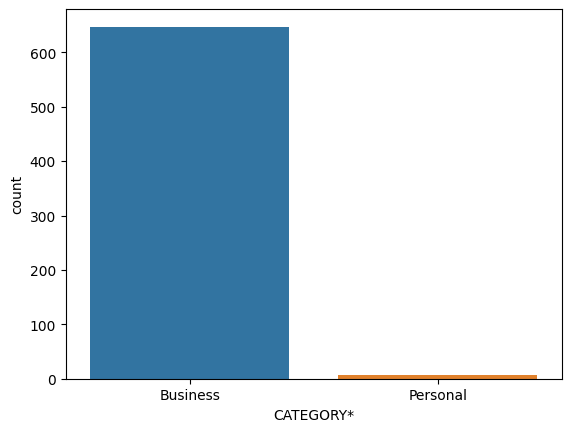

In [16]:
sns.countplot(x='CATEGORY*',data = data)

### How long do people travel with Uber?

<Axes: ylabel='Frequency'>

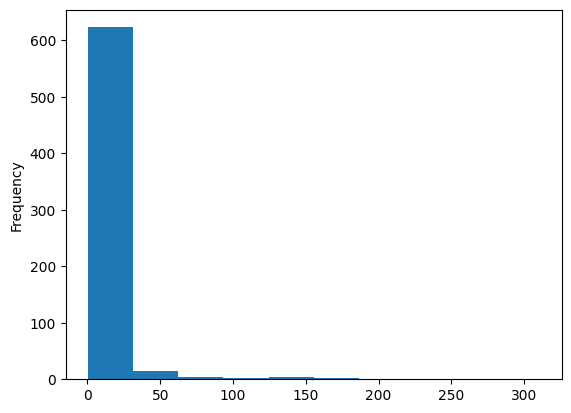

In [17]:
data['MILES*'].plot.hist()

### What Hour Do Most People Take Uber To Their Destination?

Text(0.5, 1.0, 'Number of Trips vs Hours')

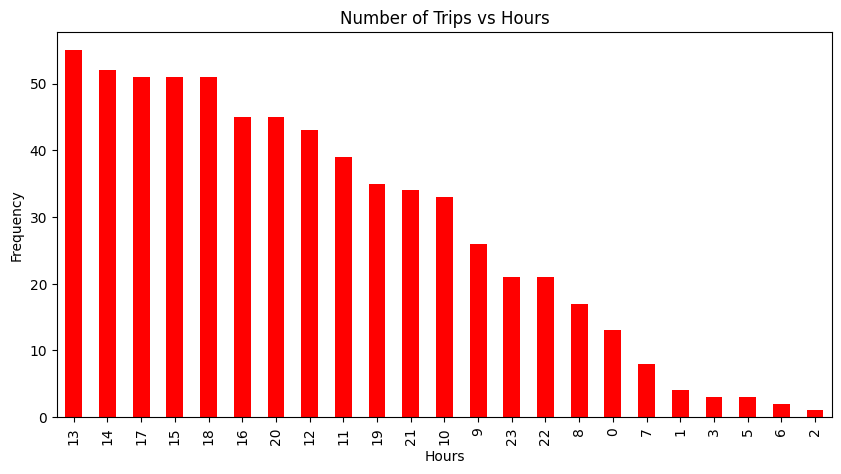

In [18]:
hours = data['START_DATE*'].dt.hour.value_counts()
hours.plot(kind = 'bar',color = 'red',figsize=(10,5))

plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of Trips vs Hours')

### Check The Purpose Of Trips

<Axes: >

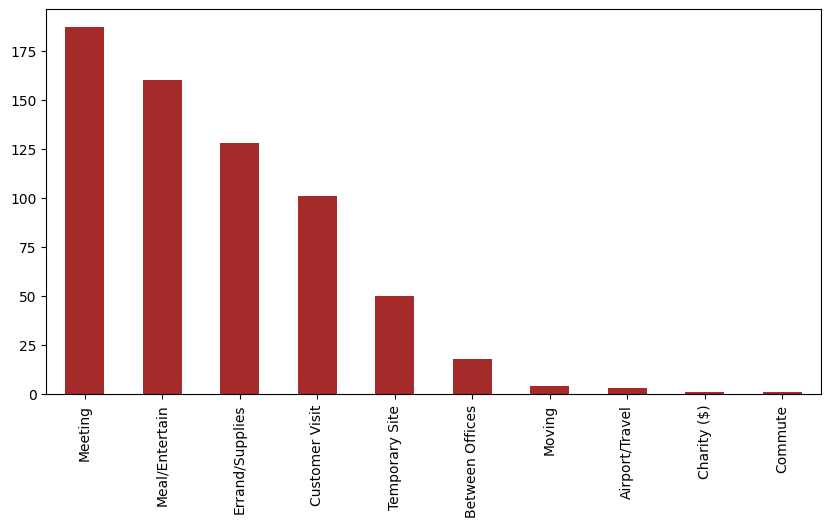

In [21]:
data['PURPOSE*'].value_counts().plot(kind='bar',figsize=(10,5),color='brown')

### Which Day Has The Highest Number Of Trips

<Axes: >

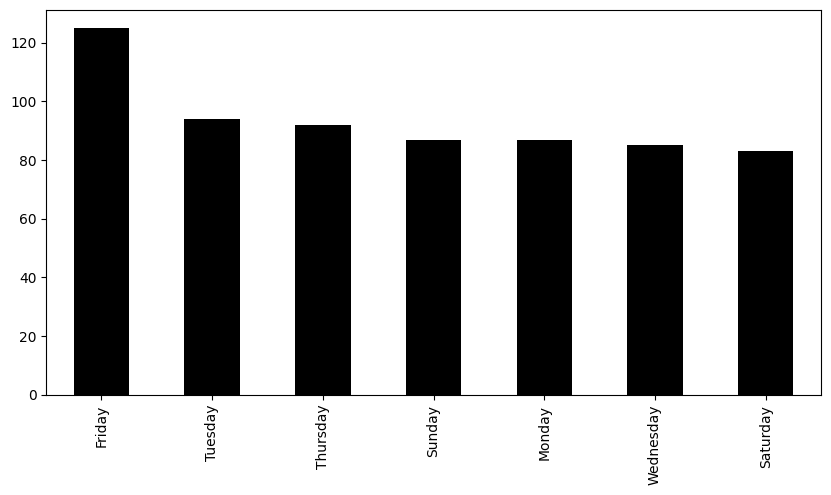

In [22]:
data['WEEKDAY'].value_counts().plot(kind='bar',figsize=(10,5),color='black')

### What Are The Number Of Trips Per Each Day?

<Axes: >

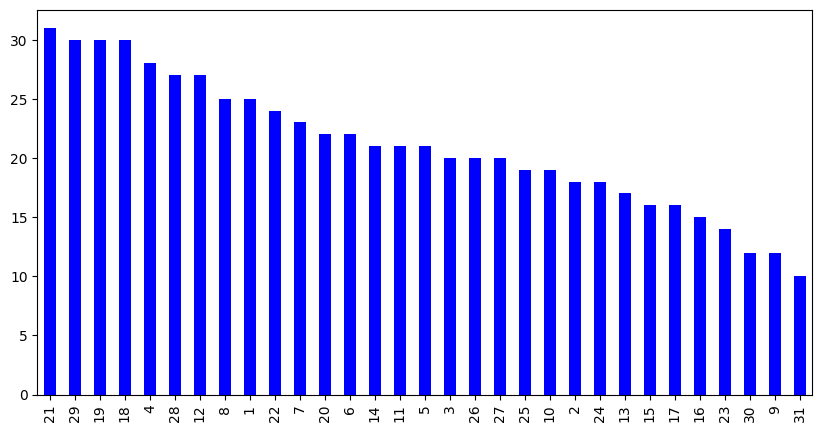

In [23]:
data['DAY'].value_counts().plot(kind='bar',figsize=(10,5),color='blue')

### What Are The Trips In the Month

<Axes: >

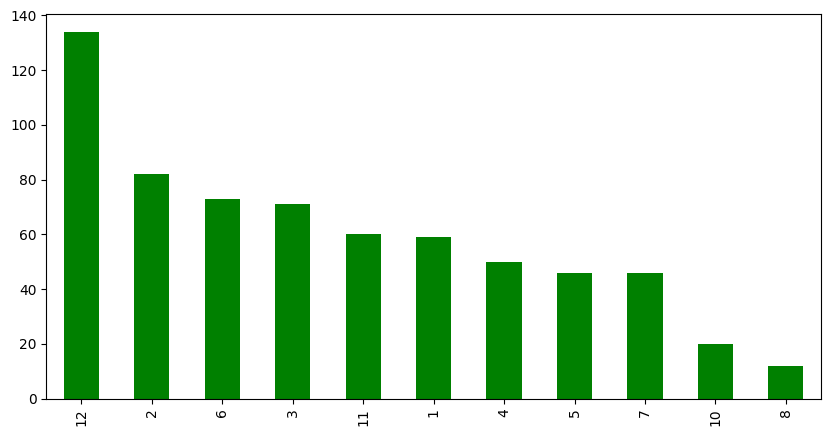

In [24]:
data['MONTH'].value_counts().plot(kind='bar',figsize=(10,5),color='green')

### The starting points of trips. Where Do People Start Boarding Their Trip From Most?

<Axes: >

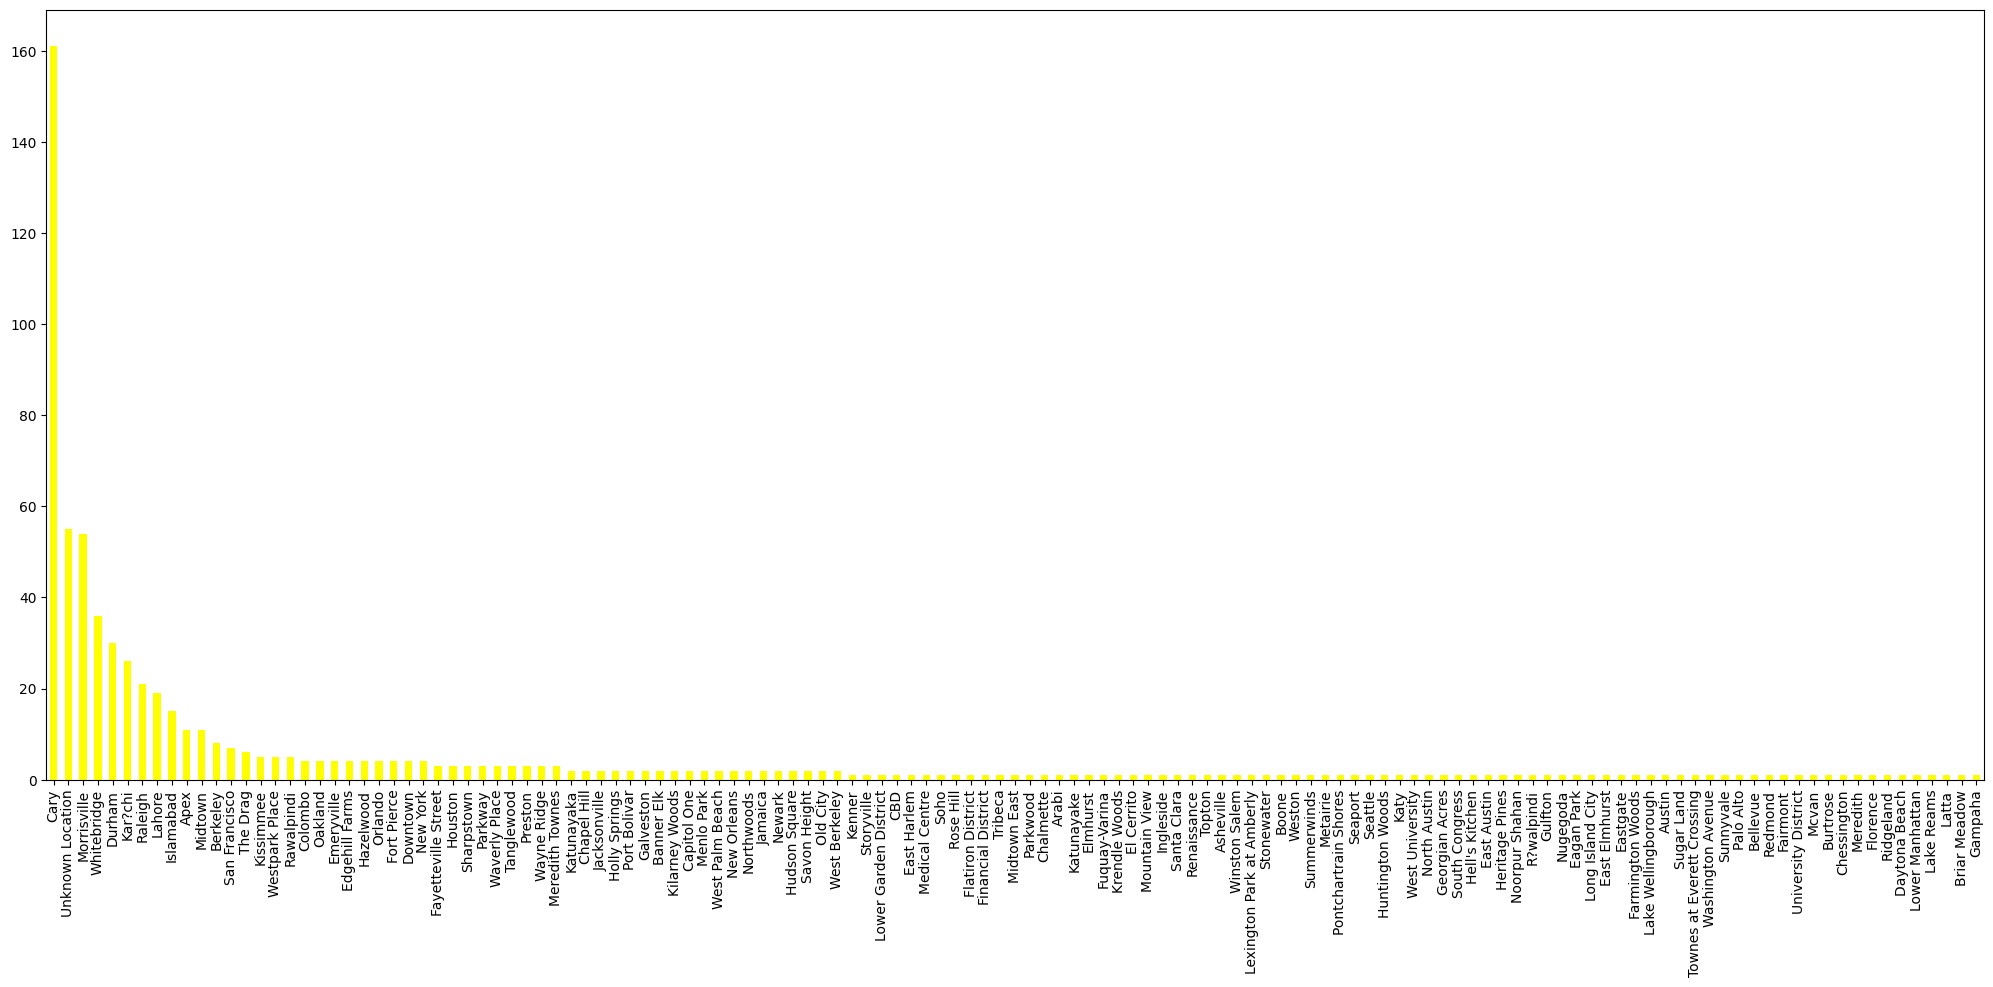

In [26]:
data['START*'].value_counts().plot(kind='bar',figsize=(25,10),color='yellow')